In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('weatherAUS.csv')

pd.set_option('display.max_columns',100)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [6]:
dropped_df=df.dropna()
dropped_df.shape

(56420, 23)

In [7]:
dropped_df=dropped_df.replace({'RainTomorrow':{'Yes':1,'No':0}})

In [8]:
num_col=[]
cat_col=[]
for col in dropped_df.columns:
    if dropped_df[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col)

In [9]:
num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

In [10]:
dropped_df[num_col].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222,0.087428
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841,-0.147467
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627,0.254342
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727,-0.130002
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129,-0.453407
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382,0.233158
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357,0.083904
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436,0.088862
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758,0.271033
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245,0.455358


<function matplotlib.pyplot.show(close=None, block=None)>

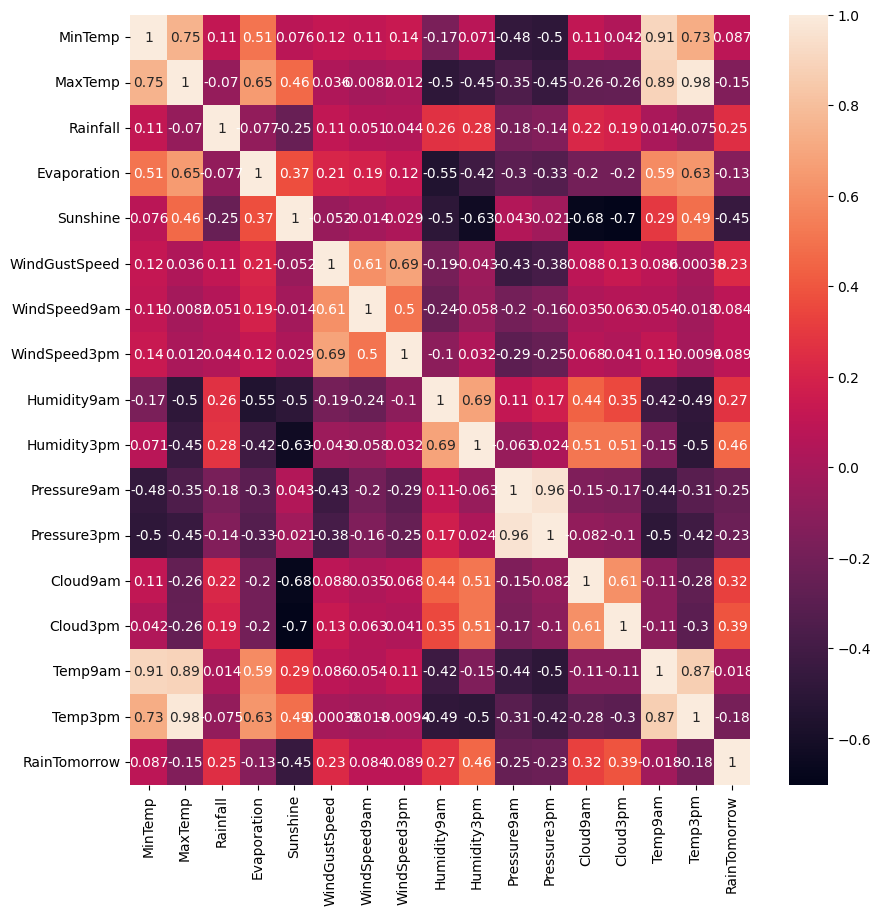

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(dropped_df[num_col].corr(),annot=True)
plt.show

In [12]:
cat_col

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [13]:
dropped_df[cat_col]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
6049,2009-01-01,Cobar,SSW,ENE,SW,No
6050,2009-01-02,Cobar,S,SSE,SSE,No
6052,2009-01-04,Cobar,NNE,NNE,NNW,No
6053,2009-01-05,Cobar,WNW,WNW,WSW,No
6054,2009-01-06,Cobar,WNW,NW,WNW,No
...,...,...,...,...,...,...
142298,2017-06-20,Darwin,ENE,SE,NE,No
142299,2017-06-21,Darwin,E,SE,SE,No
142300,2017-06-22,Darwin,E,E,W,No
142301,2017-06-23,Darwin,ESE,SE,NNW,No


In [14]:
dropped_df[cat_col].nunique()

,0
Date,3416
Location,26
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


In [15]:
dropped_df.drop(columns=['Date'],inplace=True)
cat_col.remove('Date')

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    dropped_df[col]=le.fit_transform(dropped_df[col])

In [17]:
df=dropped_df

In [18]:
x=df.drop(columns=['RainTomorrow'])
y=df['RainTomorrow']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
confusion_matrix(y_test,lr_pred)

array([[8333,  466],
       [1161, 1324]])

In [24]:
lr_acc=accuracy_score(y_test,lr_pred)
lr_acc

0.8558135412974123

In [25]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8799
           1       0.74      0.53      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
confusion_matrix(y_test,dt_pred)

array([[7594, 1205],
       [1143, 1342]])

In [28]:
dt_acc=accuracy_score(y_test,dt_pred)
dt_acc

0.7919177596596951

In [29]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      8799
           1       0.53      0.54      0.53      2485

    accuracy                           0.79     11284
   macro avg       0.70      0.70      0.70     11284
weighted avg       0.79      0.79      0.79     11284

